In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from Utilities.operators import make_tree
from Utilities.time_extractor import days_since_distruption
matplotlib.rcParams['figure.dpi'] = 150

In [2]:
folder = 'TDE'
is_tde = True
snap = '196'
m=5
path = f'{folder}/{snap}'
Rt =  (10**m)**(1/3)


In [3]:
sim_tree, X, Y, Z, Vol, VX, VY, VZ, IE, Den, Press, Temp, Diss, Entropy = make_tree(path, snap, is_tde, energy = True)
dim_cell = Vol**(1/3) # according to Elad
time, tfb = days_since_distruption(f'{path}/snap_{snap}.h5', m=m, choose = 'tfb')

In [43]:
# Import data for shockzone
shockzone = np.loadtxt(f'data/{snap}/shockzone_{snap}.txt')

idx_zone = shockzone[0]
idx_zone = np.array([int(i) for i in idx_zone])
x_zone = X[idx_zone]
y_zone = Y[idx_zone]
z_zone = Z[idx_zone]
Vx_zone = VX[idx_zone]
Vy_zone = VY[idx_zone]
Diss_zone = Diss[idx_zone]
dim_cell_zone = dim_cell[idx_zone]
print('Check if the shocked cells are over the density threshold. Min: ', np.min(Den[idx_zone]))


Check if the shocked cells are over the density threshold. Min:  1.0000538264810136e-09


In [5]:
# cfr tidal disrutption 
xRt = np.linspace(-Rt, Rt, 100)
yRt = np.linspace(-Rt, Rt, 100)
xcfr, ycfr = np.meshgrid(xRt,yRt)
cfr = xcfr**2 + ycfr**2 - Rt**2

In [6]:
# Cross section at the midplane (z=0)
X_cross = X[np.abs(Z) < dim_cell]
Y_cross = Y[np.abs(Z) < dim_cell]
VX_cross = VX[np.abs(Z) < dim_cell]
VY_cross = VY[np.abs(Z) < dim_cell]
Vol_cross = Vol[np.abs(Z) < dim_cell]
Temp_cross = Temp[np.abs(Z) < dim_cell]
Den_cross = Den[np.abs(Z) < dim_cell]
Diss_cross = Diss[np.abs(Z) < dim_cell]
Entropy_cross = Entropy[np.abs(Z) < dim_cell]

zone_cross_x = x_zone[np.abs(z_zone)< dim_cell_zone]
zone_cross_y = y_zone[np.abs(z_zone)< dim_cell_zone]

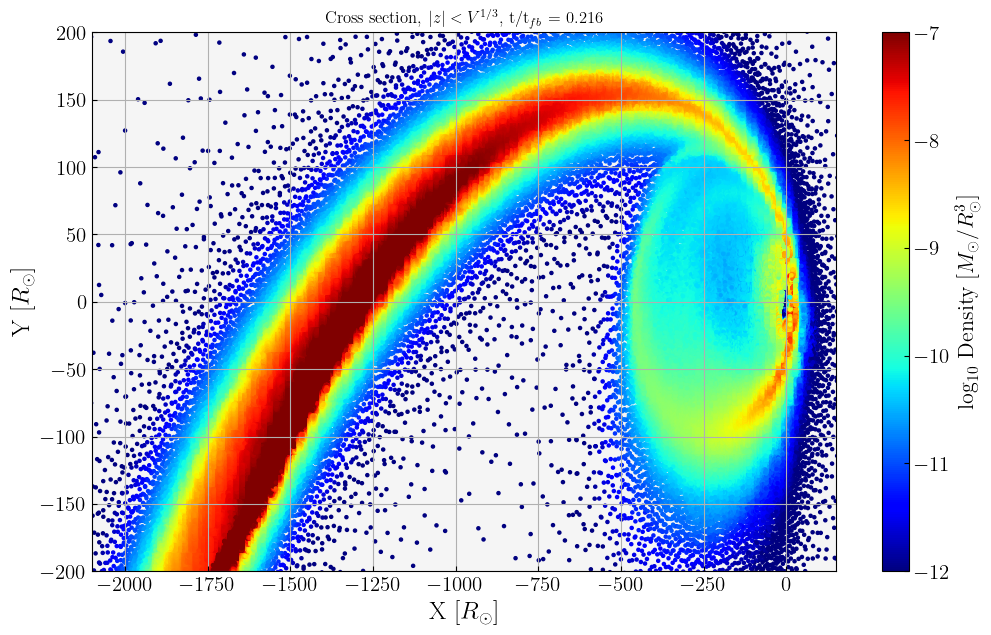

In [7]:
# Visualize the snapshot
fig, ax = plt.subplots(1,1, figsize = (12,7))
img = ax.scatter(X_cross, Y_cross, c = np.log10(Den_cross), s = 5, cmap = 'jet', vmin = -12, vmax = -7)
cbar = plt.colorbar(img)
cbar.set_label(r'$\log_{10}$ Density [$M_\odot/R_\odot^3$]', fontsize = 16)
ax.set_xlim(-2100,150)
ax.set_ylim(-200,200)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()

plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
plt.savefig('Figs/196/Density.png')

In [139]:
np.min(Den_cross)

9.998111931018634e-21

Text(0.5, 1.0, 'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = 0.216')

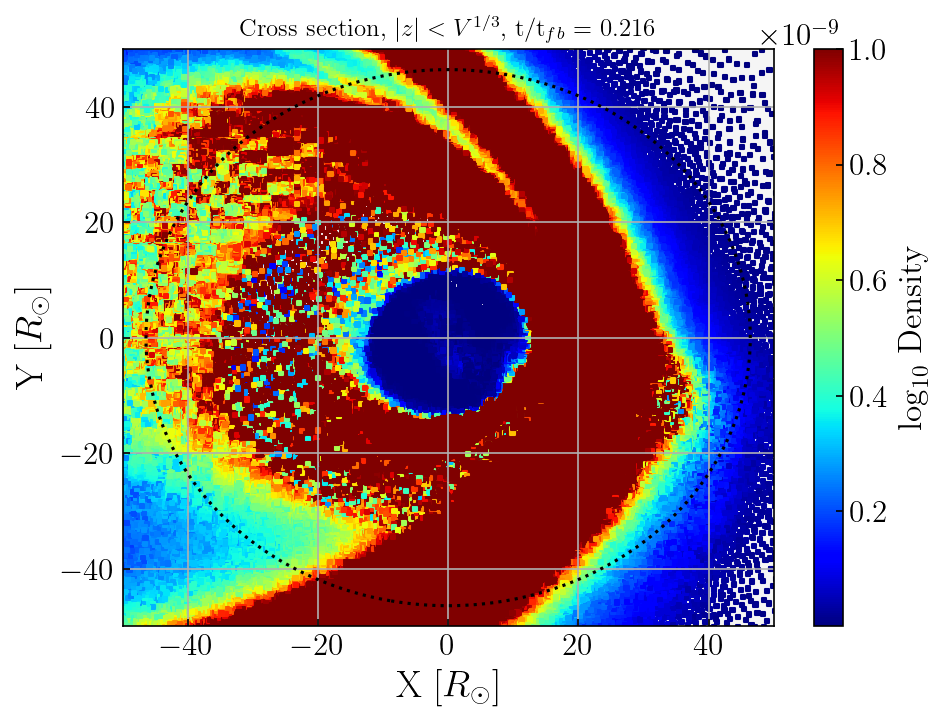

In [141]:
fig, ax = plt.subplots(1,1, figsize = (7,5))
img = ax.scatter(X_cross, Y_cross, c = Den_cross, marker= 's', s = 4, cmap = 'jet', vmin = 1e-12, vmax = 1e-9)
#ax.quiver(X_cross[::50], Y_cross[::50], VX_cross[::50], VY_cross[::50], color = 'k', angles='xy', scale_units='xy', width = 1e-3)#, scale = 40)
cbar = plt.colorbar(img)
cbar.set_label(r'$\log_{10}$ Density', fontsize = 16)
ax.contour(xcfr, ycfr, cfr, [0], linestyles = 'dotted', colors = 'k')
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))

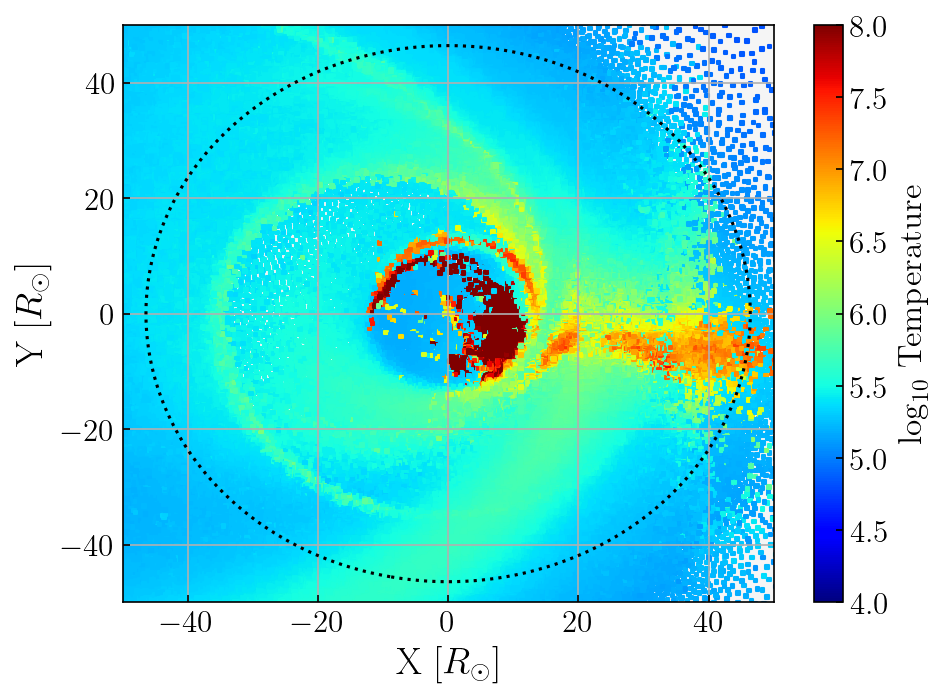

In [60]:
fig, ax = plt.subplots(1,1, figsize = (7,5))
img = ax.scatter(X_cross, Y_cross, c = np.log10(Temp_cross), marker= 's', s = 3, cmap = 'jet', vmin = 4, vmax = 8)
ax.contour(xcfr, ycfr, cfr, [0], linestyles = 'dotted', colors = 'k')
cbar = plt.colorbar(img)#, format='%.0e')
cbar.set_label(r'$\log_{10}$ Temperature', fontsize = 16)
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()
#plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))

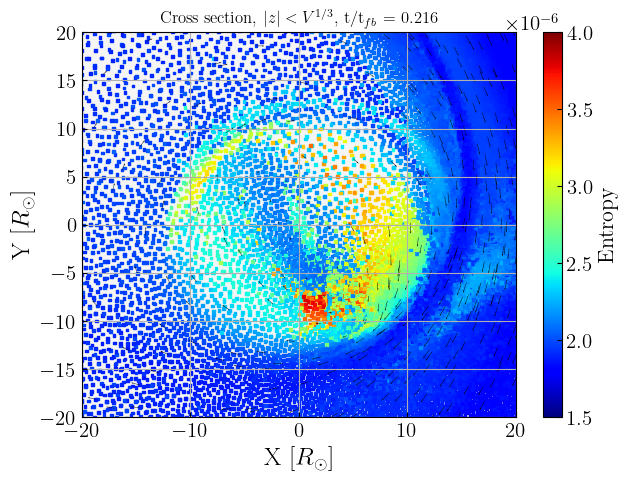

In [10]:
fig, ax = plt.subplots(1,1, figsize = (7,5))
img = ax.scatter(X_cross, Y_cross, c = Entropy_cross, marker= 's', s = 4, cmap = 'jet', vmin = 1.5e-6, vmax = 4e-6)
ax.quiver(X_cross[::50], Y_cross[::50], VX_cross[::50], VY_cross[::50], color = 'k', angles='xy', scale_units='xy', width = 1e-3)#, scale = 40)
cbar = plt.colorbar(img)#, format='%.0e')
cbar.set_label(r'Entropy', fontsize = 16)
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
plt.savefig(f'Figs/EntropyXY_{snap}.png')

Y-Z plane

In [126]:
xchosen = 20
Y_crossYZ = Y[np.abs(X-xchosen) < dim_cell]
Z_crossYZ = Z[np.abs(X-xchosen) < dim_cell]
VY_crossYZ = VY[np.abs(X-xchosen) < dim_cell]
VZ_crossYZ = VZ[np.abs(X-xchosen) < dim_cell]
Temp_crossYZ = Temp[np.abs(X-xchosen) < dim_cell]
Den_crossYZ = Den[np.abs(X-xchosen) < dim_cell]

Text(0.5, 1.0, 'Cross section, X = 20R$_\\odot$')

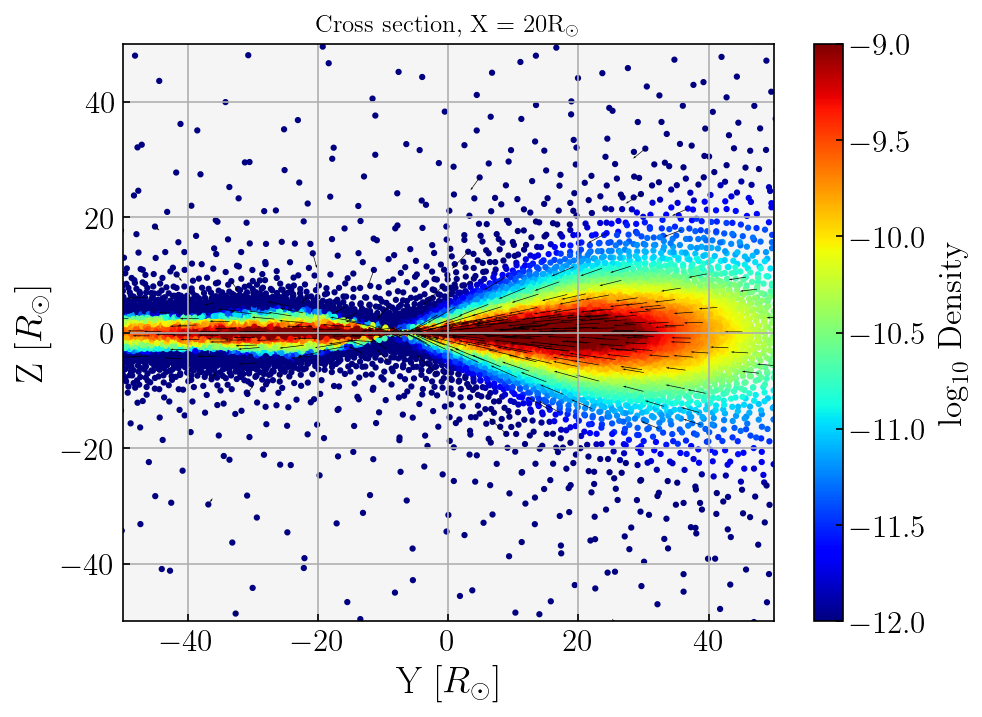

In [135]:
fig, ax = plt.subplots(1,1, figsize = (7,5))
img = ax.scatter(Y_crossYZ, Z_crossYZ, c = np.log10(Den_crossYZ),  s = 4, cmap = 'jet', vmin = -12, vmax = -9)
ax.quiver(Y_crossYZ[::50], Z_crossYZ[::50], VY_crossYZ[::50], VZ_crossYZ[::50], color = 'k', angles='xy', scale_units='xy', width = 1e-3)#, scale = 40)
cbar = plt.colorbar(img)
cbar.set_label(r'$\log_{10}$ Density', fontsize = 16)
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
ax.set_xlabel(r'Y [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Z [$R_\odot$]', fontsize = 18)
plt.grid()
plt.title(f'Cross section, X = {xchosen}' + r'R$_\odot$')


In [132]:
ychosen = 20
X_crossXZ = X[np.abs(Y-ychosen) < dim_cell]
Z_crossXZ = Z[np.abs(Y-ychosen) < dim_cell]
VX_crossXZ = VX[np.abs(Y-ychosen) < dim_cell]
VZ_crossXZ = VZ[np.abs(Y-ychosen) < dim_cell]
Temp_crossXZ = Temp[np.abs(Y-ychosen) < dim_cell]
Den_crossXZ = Den[np.abs(Y-ychosen) < dim_cell]

Text(0.5, 1.0, 'Cross section, Y = 20R$_\\odot$')

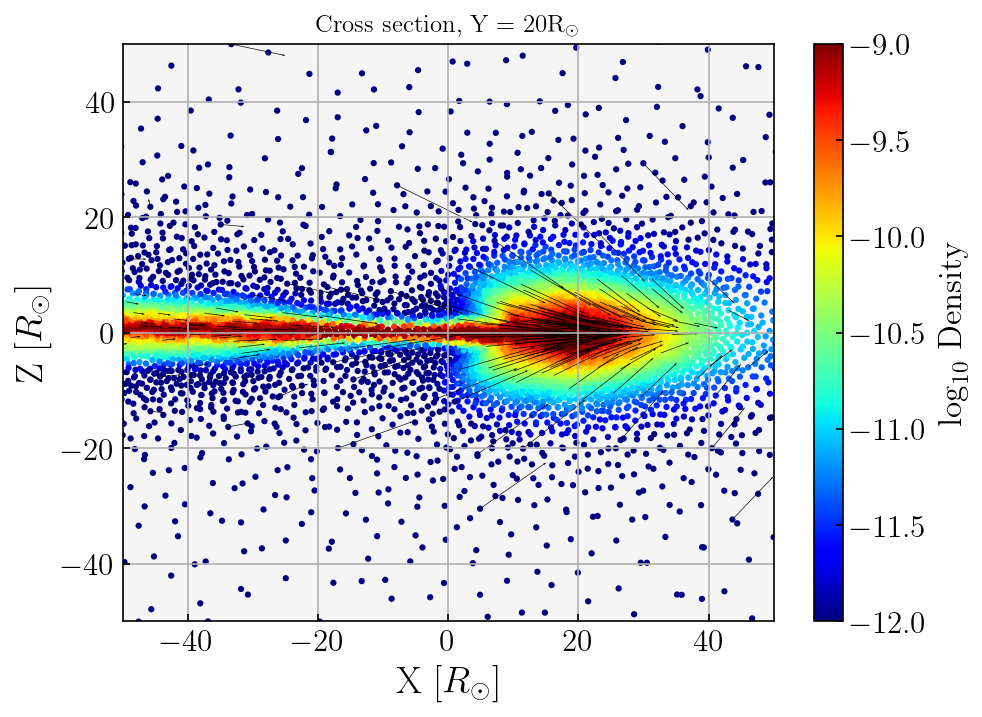

In [134]:
fig, ax = plt.subplots(1,1, figsize = (7,5))
img = ax.scatter(X_crossXZ, Z_crossXZ, c = np.log10(Den_crossXZ),  s = 4, cmap = 'jet', vmin = -12, vmax = -9)
ax.quiver(X_crossXZ[::50], Z_crossXZ[::50], VX_crossXZ[::50], VZ_crossXZ[::50], color = 'k', angles='xy', scale_units='xy', width = 1e-3)#, scale = 40)
cbar = plt.colorbar(img)
cbar.set_label(r'$\log_{10}$ Density', fontsize = 16)
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Z [$R_\odot$]', fontsize = 18)
plt.grid()
plt.title(f'Cross section, Y = {ychosen}' + r'R$_\odot$')

Shiokawa+15

In [11]:
# X-Z plane with Y=Ypericenter
condition_Shio = np.logical_and(np.abs(X)<40, np.abs(Z)<40)
conditions = np.abs(Y-Rt)<0.2
X_shio = X[conditions]
Z_shio = Z[conditions]
Entropy_shio = Entropy[conditions]
VX_shio = VX[conditions]
VZ_shio = VZ[conditions]

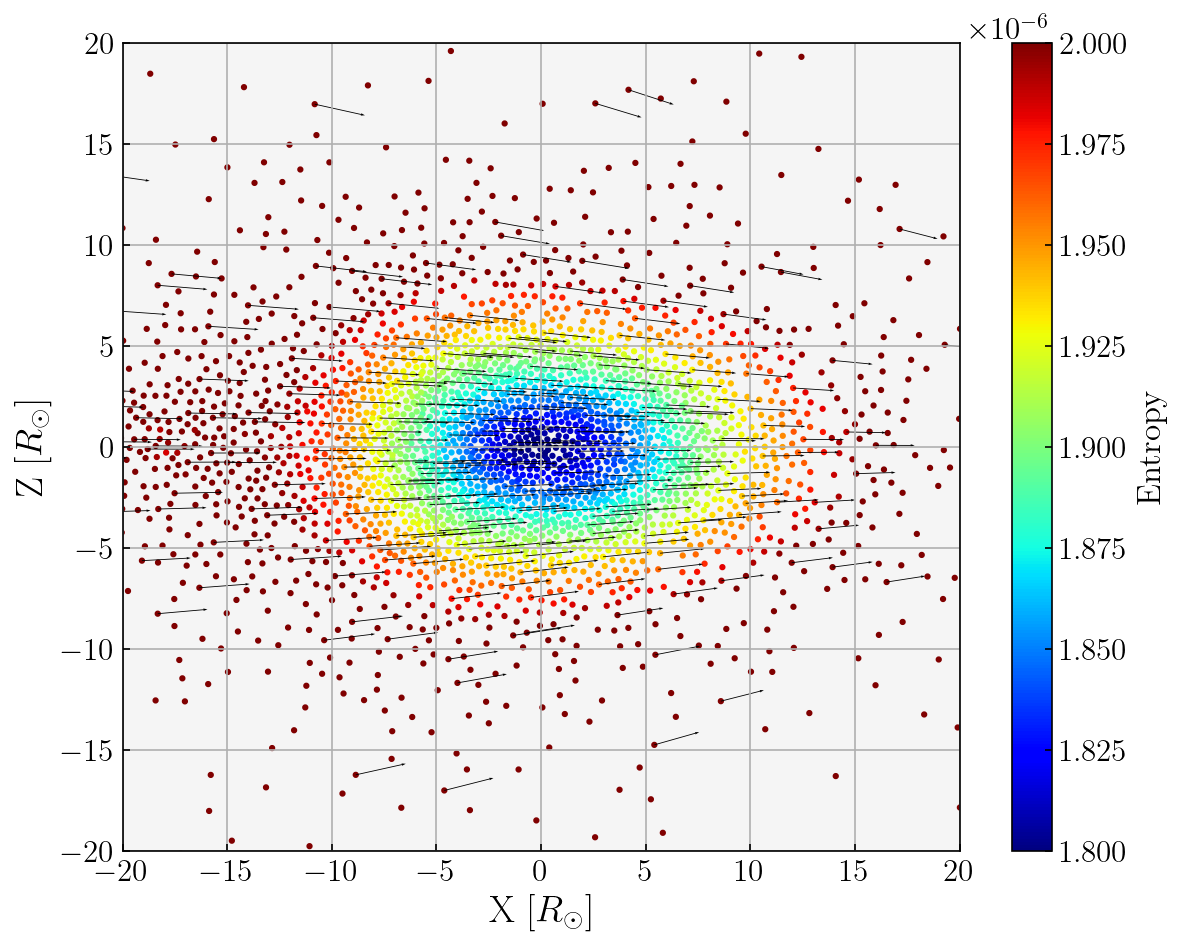

In [83]:
fig, ax = plt.subplots(1,1, figsize = (9,7))
img = ax.scatter(X_shio, Z_shio, c = Entropy_shio, s = 4, cmap = 'jet', vmin = 1.8e-6, vmax = 2e-6)
ax.quiver(X_shio[::10], Z_shio[::10], VX_shio[::10], VZ_shio[::10], color = 'k', angles='xy', scale_units='xy', width = 1e-3, scale = 20)
#ax.plot(x_zone, z_zone, 'ks', markerfacecolor='none', ms = 5, markeredgecolor='k')
cbar = plt.colorbar(img)#, format='%.0e')
cbar.set_label(r'Entropy', fontsize = 16)
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Z [$R_\odot$]', fontsize = 18)
plt.grid()
#plt.title(r'Cross section, Y = $R_p$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
#plt.savefig(f'Figs/EntropyXZ_{snap}.png')

In [44]:
shocksurface = np.loadtxt(f'data/{snap}/shocksurface_{snap}.txt')

idx_surf = shocksurface[0]
idx_surf = np.array([int(i) for i in idx_surf])
x_surf = x_zone[idx_surf]
y_surf = y_zone[idx_surf]
z_surf = z_zone[idx_surf]

vx_surf = Vx_zone[idx_surf]
vy_surf = Vy_zone[idx_surf]

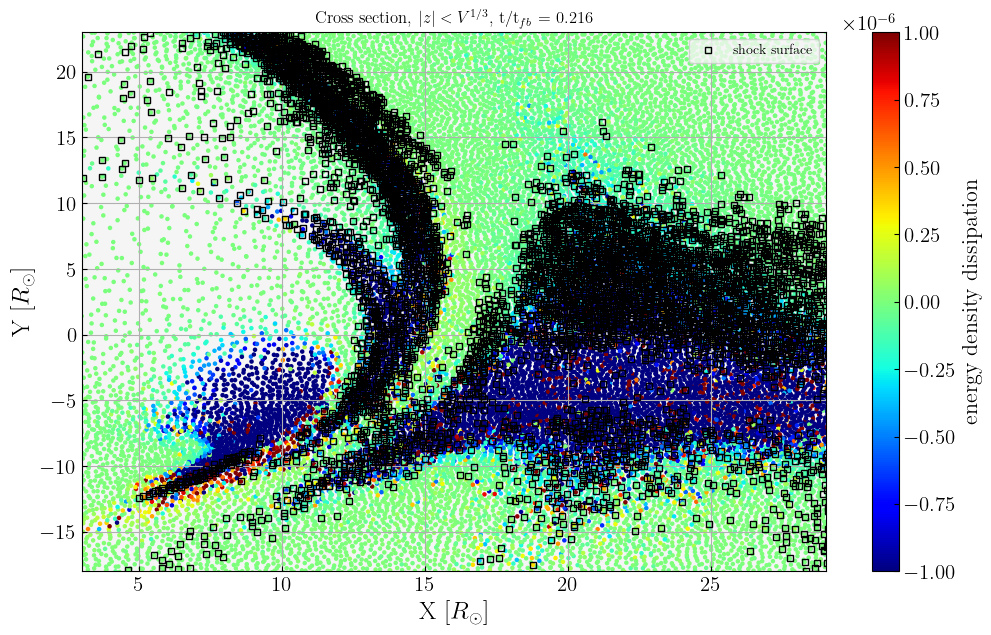

In [35]:
fig, ax = plt.subplots(1,1, figsize = (12,7))
img = ax.scatter(X_cross, Y_cross, c = Diss_cross/Vol_cross, s = 5, cmap = 'jet', vmin = -1e-6, vmax = 1e-6)
cbar = plt.colorbar(img)#, format='%.0e')
cbar.set_label('energy density dissipation', fontsize = 16)
#ax.plot(zone_cross_x, zone_cross_y, 'ks', markerfacecolor='none', ms = 5, markeredgecolor='k', label = 'shock zone')
ax.plot(x_surf, y_surf, 'ks', markerfacecolor='none', ms = 5, markeredgecolor='k', label = 'shock surface')
ax.set_xlim(3,29)
ax.set_ylim(-18,23)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
plt.legend(loc = 'upper right')
plt.savefig('Figs/EnDisszone.png')

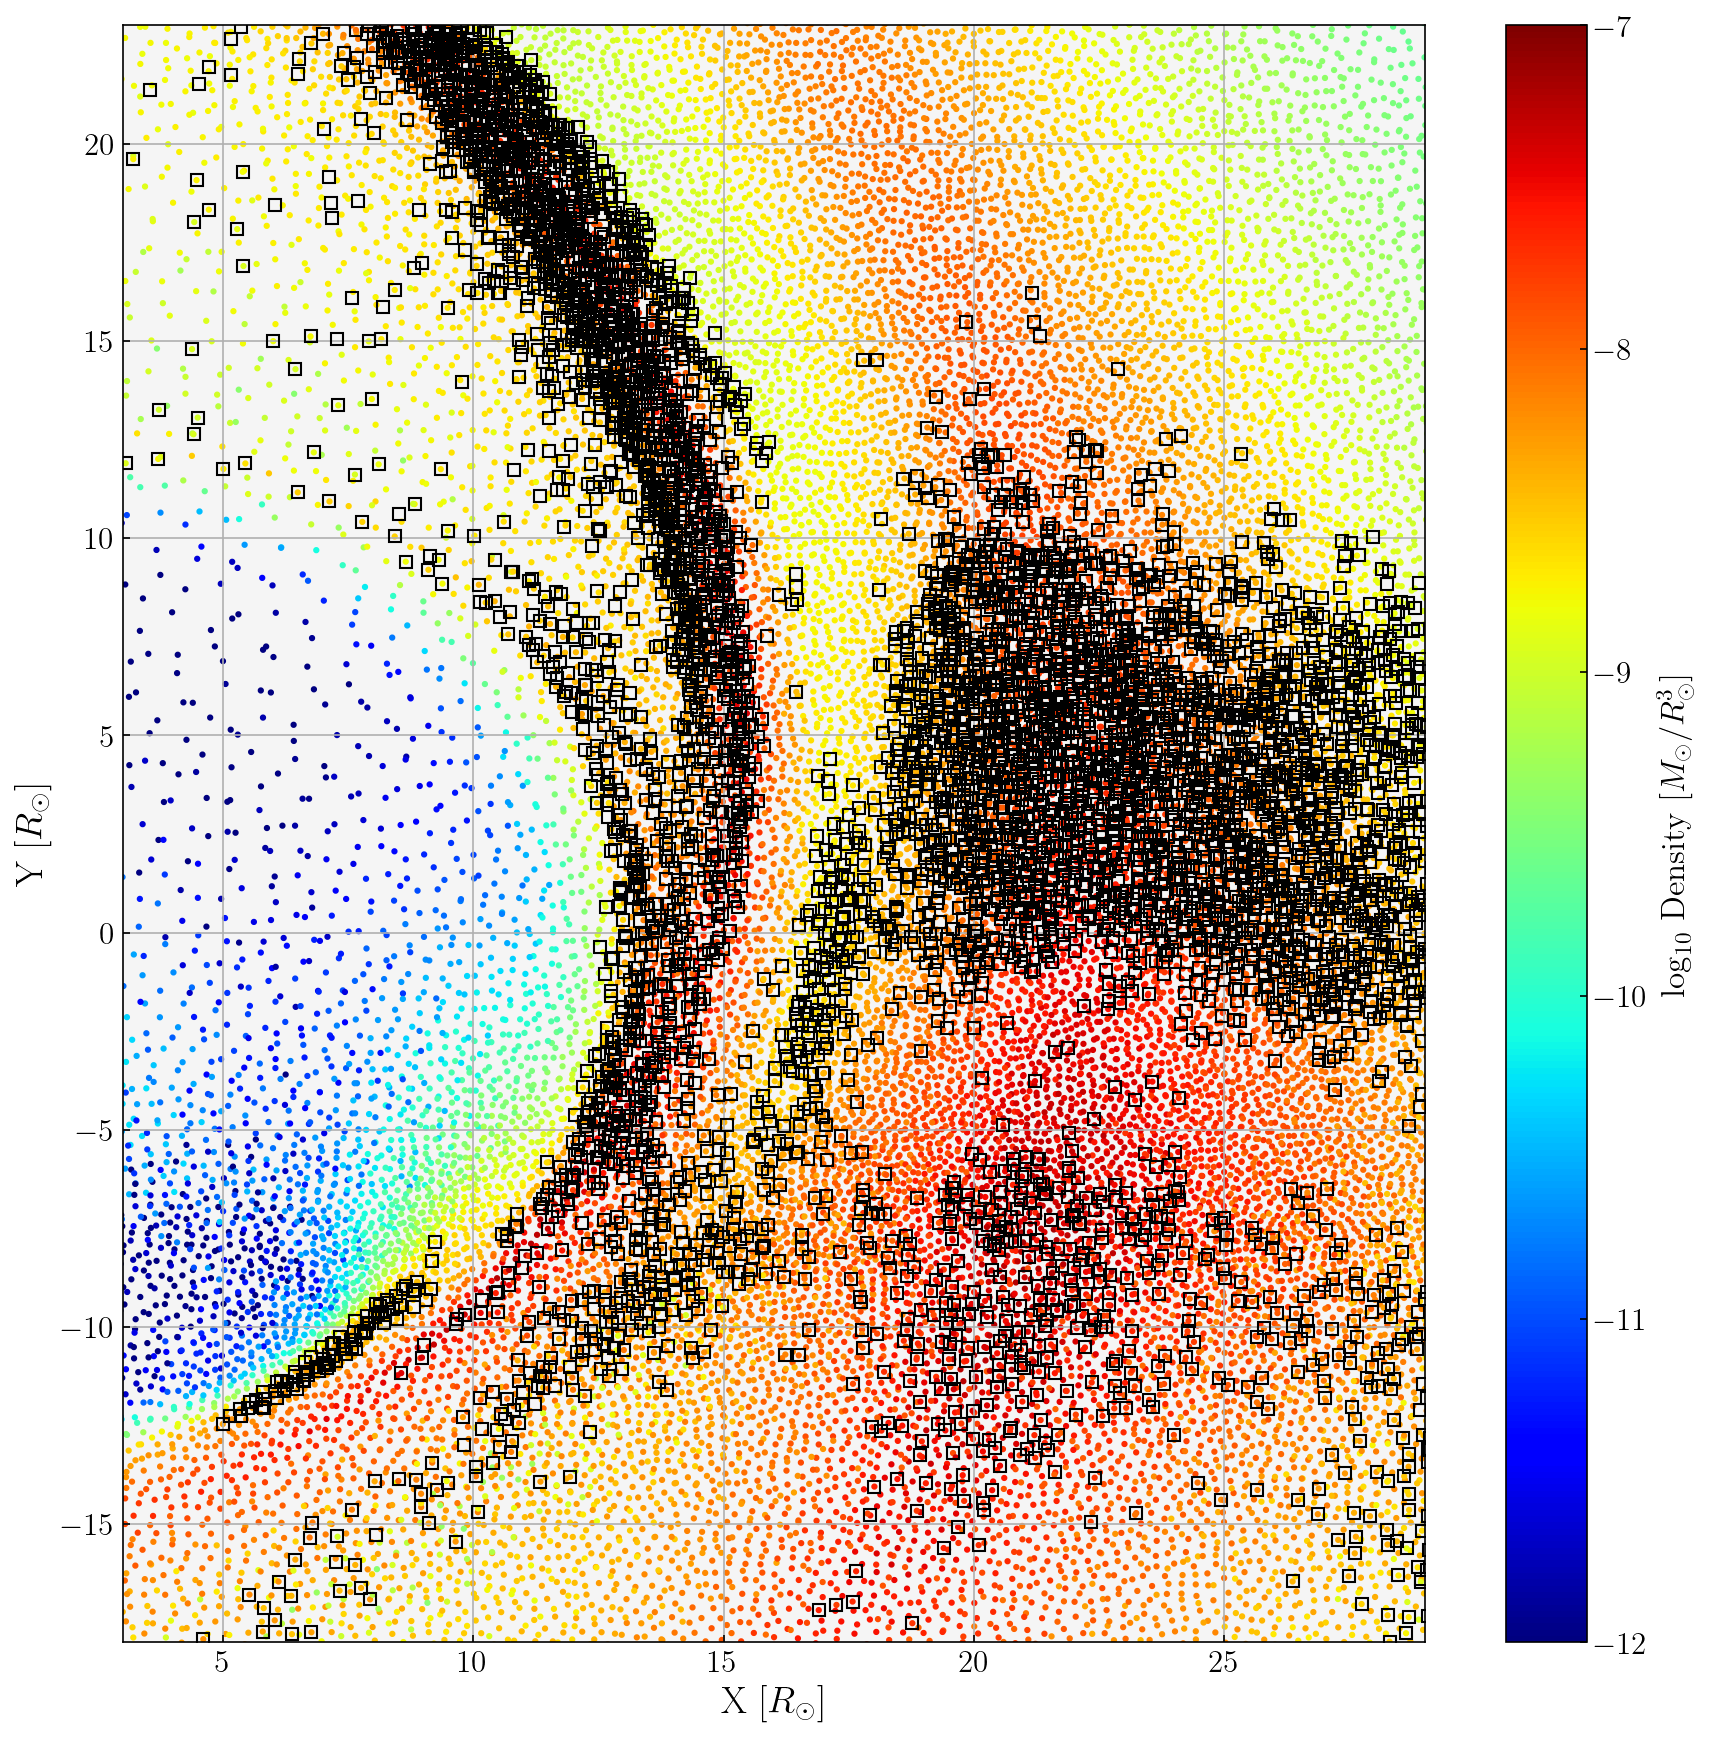

In [81]:
fig, ax = plt.subplots(1,1, figsize = (14,14))
ax.plot(x_surf, y_surf, 'ks', markerfacecolor='none', ms = 6, markeredgecolor='k')
img = ax.scatter(X_cross, Y_cross, c = np.log10(Den_cross), s = 4, cmap = 'jet', vmin = -12, vmax = -7)
cbar = plt.colorbar(img)#, format='%.0e')
cbar.set_label(r'$\log_{10}$ Density [$M_\odot/R_\odot^3$]', fontsize = 16)
ax.set_xlim(3,29)
ax.set_ylim(-18,23)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()
#plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)), fontsize = 15)
plt.savefig('Figs/Densityshock.png')

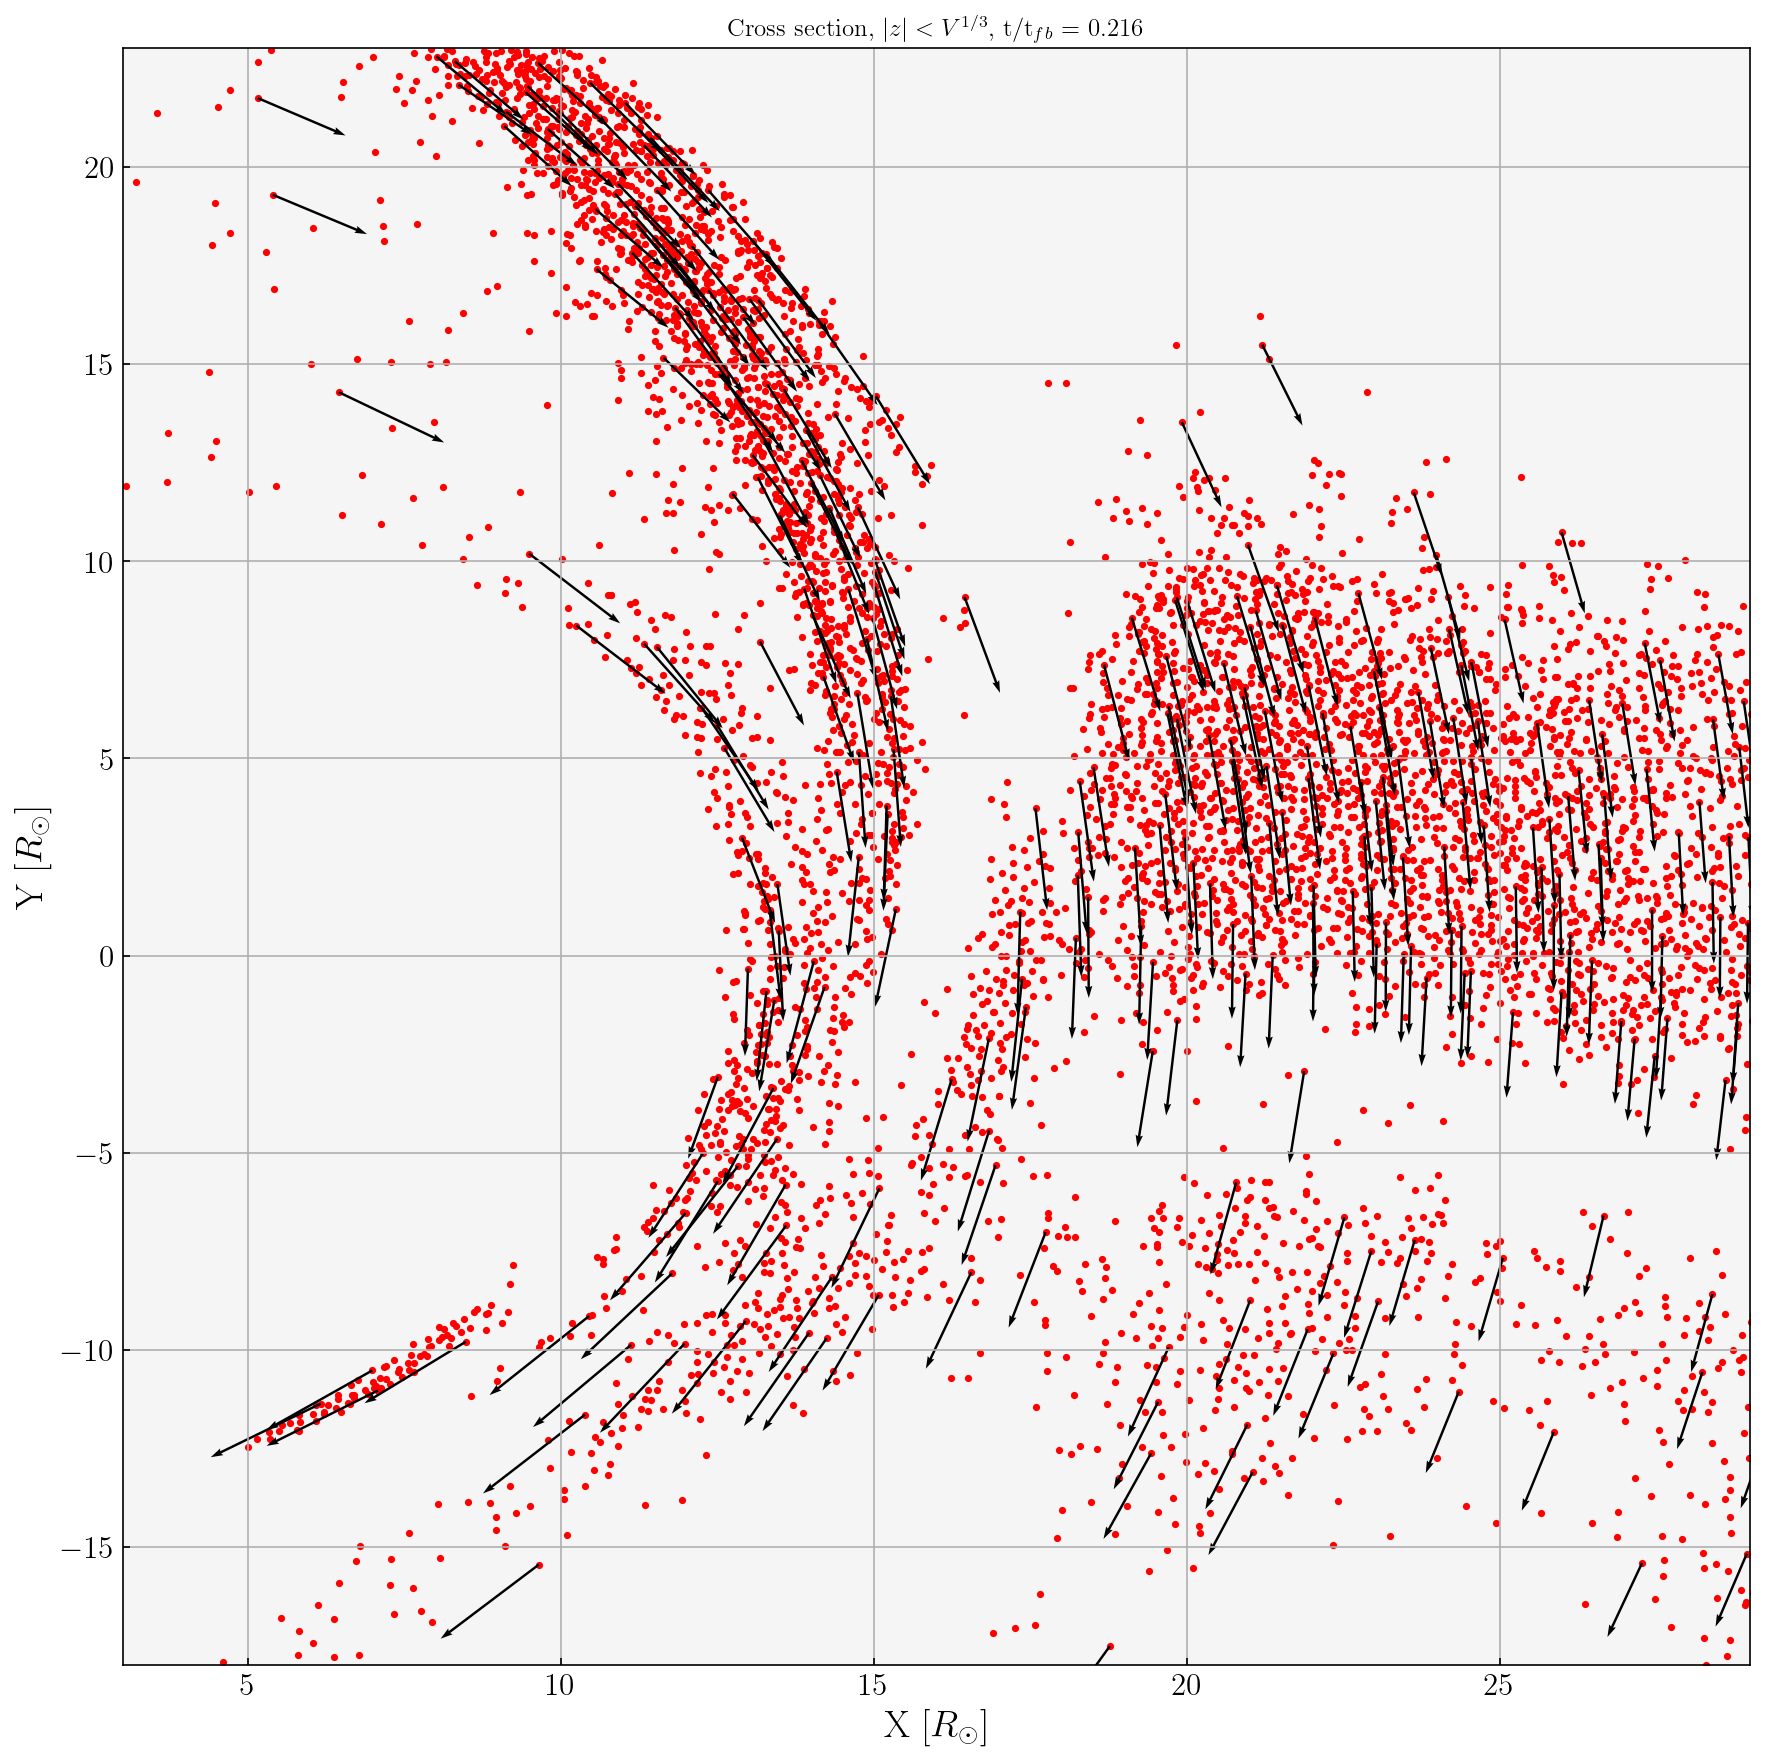

In [82]:
fig, ax = plt.subplots(1,1, figsize = (14,14))
ax.scatter(x_surf, y_surf,  c = 'r',s = 6)
ax.quiver(x_surf[::20], y_surf[::20], vx_surf[::20], vy_surf[::20], color = 'k', angles='xy', scale_units='xy', width = 1.5e-3, scale = 40)
ax.set_xlim(3,29)
ax.set_ylim(-18,23)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
plt.savefig('Figs/shockVel.png')

Elad's plot

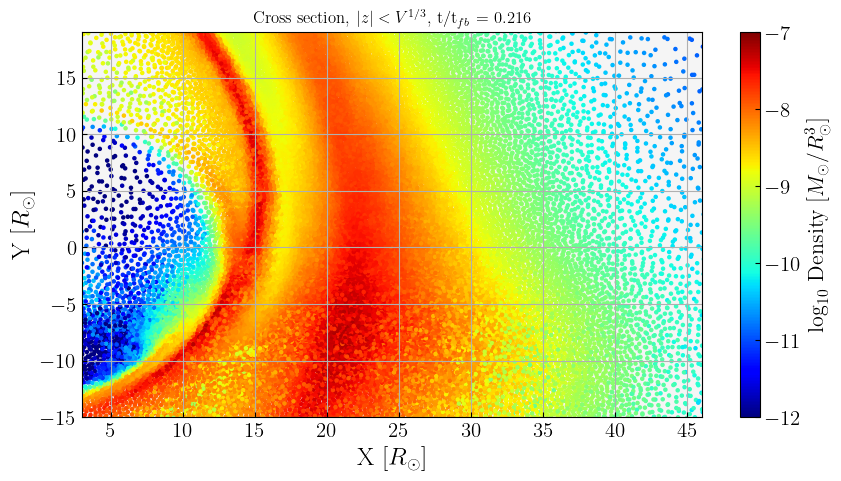

In [37]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
img = ax.scatter(X_cross, Y_cross, c = np.log10(Den_cross), s = 5, cmap = 'jet', vmin = -12, vmax = -7)
cbar = plt.colorbar(img)#, format='%.0e')
cbar.set_label(r'$\log_{10}$ Density [$M_\odot/R_\odot^3$]', fontsize = 16)
#ax.plot(x_surf, y_surf, 'ks', markerfacecolor='none', ms = 5, markeredgecolor='k')
ax.set_xlim(3,46)
ax.set_ylim(-15,19)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
plt.savefig('Figs/EladDensityzoom.png')

Text(0.5, 1.0, 'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = 0.216')

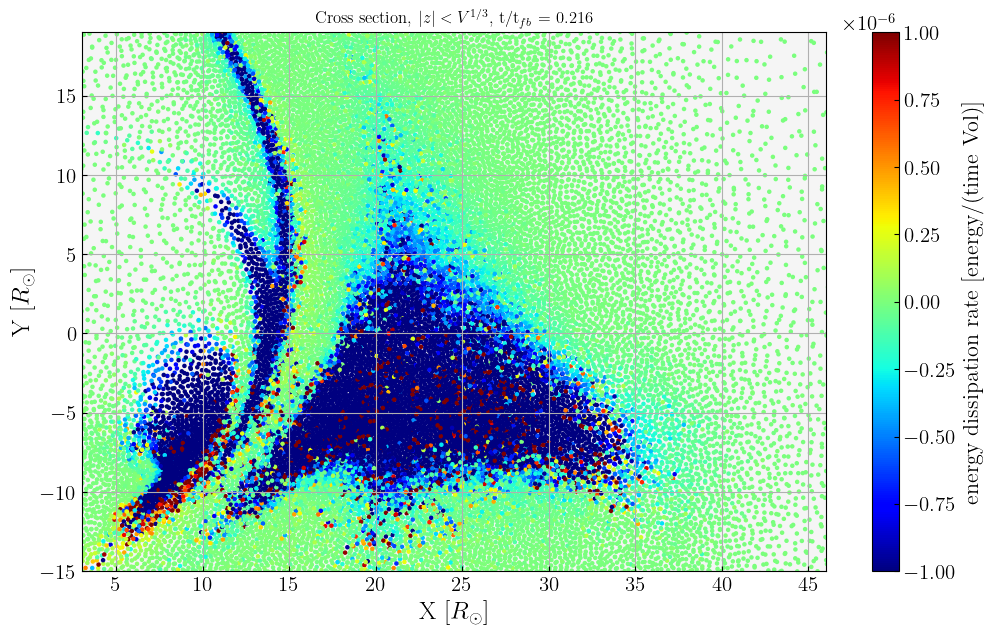

In [30]:
fig, ax = plt.subplots(1,1, figsize = (12,7))
img = ax.scatter(X_cross, Y_cross, c = Diss_cross/Vol_cross, s = 5, cmap = 'jet', vmin = -1e-6, vmax = 1e-6)
cbar = plt.colorbar(img)#, format='%.0e')
cbar.set_label('energy dissipation rate [energy/(time Vol)]', fontsize = 16)
ax.set_xlim(3,46)
ax.set_ylim(-15,19)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
#plt.savefig('Figs/EladEnDiss.png')